### Import Statements

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import sys
import copy

In [2]:
%matplotlib inline

In [3]:
from funcs import matplotlib_imshow

## Image Transformation Operations

In [4]:
cat_img = cv.imread("./imgs/cat.jpeg")

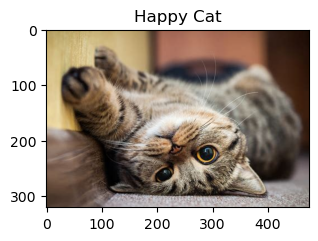

In [5]:
matplotlib_imshow("Happy Cat", cat_img, 5)

- ### Rotating an Image

A *2x3 transformation matrix* is required for scaled rotation with adjustable center of rotation (so that you can rotate at any location you prefer). This transformation matrix is obtained by the `cv.getRotationMatrix2D()` function and the output of this function is fed to the `cv.warpAffine()` function.

> The `cv.getRotationMatrix2D(center, angle, scale)` function

The modified transformation matrix is given by, <img src="./imgs/get_rotation_matrix_2D.png">

<u>Function Parameters</u>
- center: Center of rotation in the form of (x, y).
- angle: Angle of rotation in degrees. Positive values mean counter-clockwise rotation (the coordinate origin is assumed to be the top-left corner).
- scale: Image scaling factor.

> The `cv.warpAffine(src, M, dsize)` function

This function is used to apply the transformation matrix to the input image.

<u>Function Parameters</u>
- src: input imgae
- M: 2x3 transformation matrix
- dsize: output image size in the form of (width, height)

In [6]:
# rotating the demo_img by 90 degrees CW
img_w = cat_img.shape[0]
img_h = cat_img.shape[1]
image_center = (img_w / 2), (img_h / 2)
transformation_matrix = cv.getRotationMatrix2D(image_center, 90, 0.8)
rotated_img = cv.warpAffine(cat_img, transformation_matrix, (img_w, img_h))

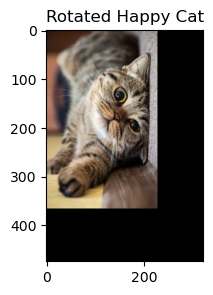

In [7]:
matplotlib_imshow("Rotated Happy Cat", rotated_img, 3)

- ### Flipping an Image

We can do this by rotating the image by 180 degrees or using the `cv.flip()` method.


> `cv.flip(src, flipCode)` function


<u>Function Parameters</u>
- src: input image
- flip code: A flag to specify how to flip the image array. 
    - 0 means flipping around the x-axis 
    - positive value (for example, 1) means flipping around y-axis
    - Negative value (for example, -1) means flipping around both axes

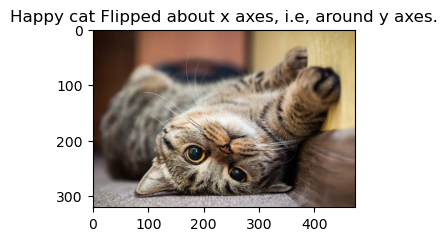

In [8]:
flipped_img = cv.flip(cat_img, 1)
matplotlib_imshow("Happy cat Flipped about x axes, i.e, around y axes.", flipped_img, 5)

- ### Re-sizing and Scaling

Re-sizing and scaling operations are fairly similar. They both aims to enlarge or reduce the size of an image. But there's a difference too. Re-sizing means changing both the width and the height whereas, `scaling preserves the aspect ratio`.

OpenCV comes with a function `cv.resize()` that can be used both for resizing to a desired size and also for scaling.

**Interpolation Methods:**

*Since an image is essentially a numpy array, when we resize an image the 'resize' function needs to interpolate data for all the points in the new image from the sources image.*

- Different interpolation methods are available [(see this list)](https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#ga5bb5a1fea74ea38e1a5445ca803ff121). Preferable interpolation methods are, 
    - *cv.INTER_AREA* for shrinking 
    - *cv.INTER_CUBIC* (slow) & *cv.INTER_LINEAR* for zooming 
    
    By default, the interpolation method *cv.INTER_LINEAR* is used for all resizing purposes. 

> `cv.resize(src, dsize, fx, fy, interpolation)` function


<u>Function Parameters</u>
- src: input image
- dsize: output image size in the form of (width, height). For scaling purpose use, 'dsize=None'
- fx: scaling factor along the horizontal axis
- fy: scaling factor along the vertical axis
- interpolation: interpolation flags

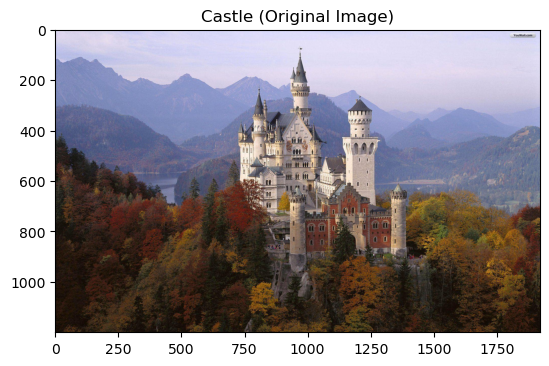

In [12]:
castle_img = cv.imread("./imgs/castle.jpg")
matplotlib_imshow("Castle (Original Image)", castle_img, 10)

In [13]:
fifty_percent_castle_img = cv.resize(
    castle_img, None, fx=0.5, fy=0.5, interpolation=cv.INTER_AREA
)

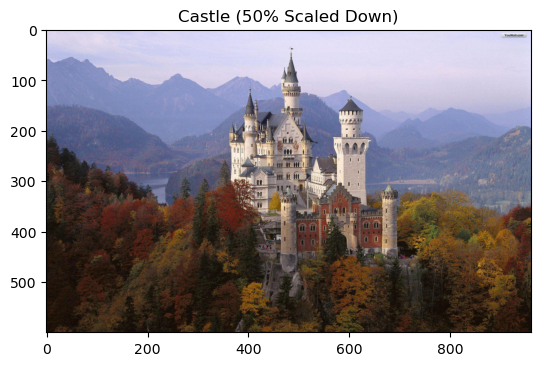

In [14]:
matplotlib_imshow("Castle (50% Scaled Down)", fifty_percent_castle_img, 10)

- ### Cropping an Image

Image cropping is done **by slicing out the image array.**

**`Note:`**
- pixels along the width of an image (along the x axis) are stored as columns in the array
- pixels along the height of an image (along the y axis) are stored as rows in the array

In [15]:
width_crop_start = 650
width_crop_end = 1300
height_crop_start = 20
height_crop_end = 600

In [16]:
castle_img_copy = copy.deepcopy(castle_img)

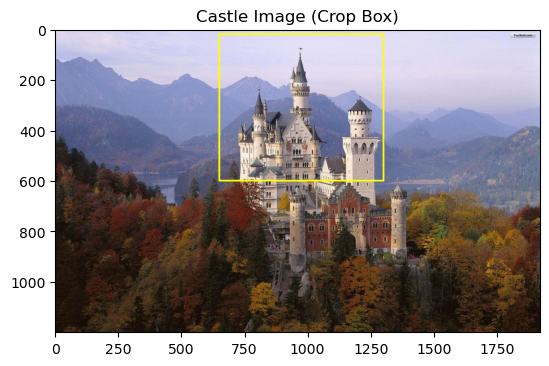

In [17]:
# drawing a rectangular box to show which portion of the image will be cropped
crop_box = cv.rectangle(
    castle_img_copy,
    (width_crop_start, height_crop_start),
    (width_crop_end, height_crop_end),
    color=(0, 255, 255),
    thickness=5,
)
matplotlib_imshow("Castle Image (Crop Box)", crop_box, 10)

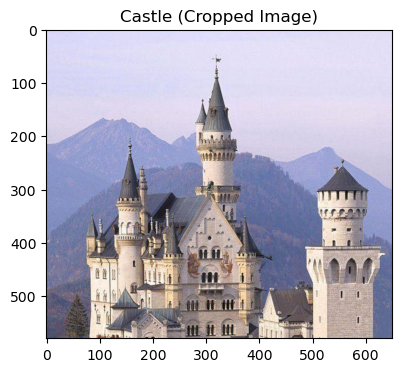

In [18]:
# image cropping: ndarray[rows, cols]

cropped_image = castle_img[
    height_crop_start:height_crop_end, width_crop_start:width_crop_end
]
matplotlib_imshow("Castle (Cropped Image)", cropped_image, 5)